In [1]:
import mdtraj
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
traj_15 = mdtraj.load('adp_T300_15ns.trr', top='adp_T300_15ns.gro')

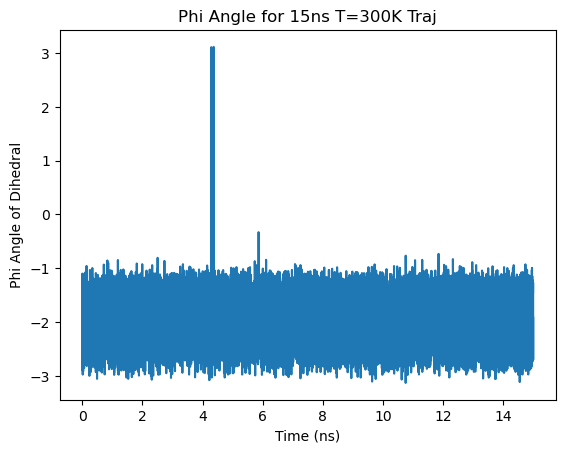

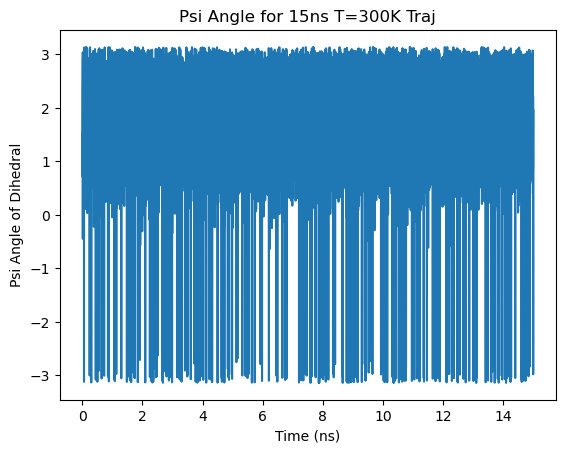

In [13]:
y_phi = mdtraj.compute_phi(traj_15, periodic=True, opt=True)[1]
x = [i/1000 for i in range(len(y_phi))]
plt.plot(x, y_phi)

plt.xlabel('Time (ns)')
plt.ylabel('Phi Angle of Dihedral')
plt.title("Phi Angle for 15ns T=300K Traj")
plt.savefig("../Figures/phi_15ns.png")
plt.show()

y_psi = mdtraj.compute_psi(traj_15, periodic=True, opt=True)[1]
plt.plot(x, y_psi)

plt.xlabel('Time (ns)')
plt.ylabel('Psi Angle of Dihedral')
plt.title("Psi Angle for 15ns T=300K Traj")
plt.savefig("../Figures/psi_15ns.png")
plt.show()

In [6]:
def fes_gen(traj, name, adjust=False):
    y_phi = mdtraj.compute_phi(traj, periodic=True, opt=True)[1]    
    y_psi = mdtraj.compute_psi(traj, periodic=True, opt=True)[1]
    x = [i/1000 for i in range(len(y_phi))]
    hist, x_edge, y_edge = np.histogram2d(x=y_phi.flatten(), 
                                      y=y_psi.flatten(), 
                                      bins=[25,25], 
                                      range=[[-np.pi, np.pi],[-np.pi, np.pi]])
    F = -np.log(hist)
    F_plt = F - np.min(F)
    
    if adjust:
        F_plt = np.minimum(F_plt, 6)
        
    c = plt.imshow(np.rot90(F_plt), 
           extent =[x_edge[0], x_edge[-1], y_edge[-1], y_edge[0]], 
           cmap ='viridis'
          )
    plt.xlabel("Dihedral Phi")
    plt.ylabel("Dihedral Psi")
    plt.colorbar(c, label="F(phi,psi)-min(F(phi,psi))")
    plt.savefig("../Figures/{}_FES.png".format(name))
    plt.title("FES for {}".format(name))
    plt.show()
    return F.T, x_edge, y_edge

/state/partition1/job-52002269/ipykernel_568851/3553127455.py:9: RuntimeWarning: divide by zero encountered in log
  F = -np.log(hist)


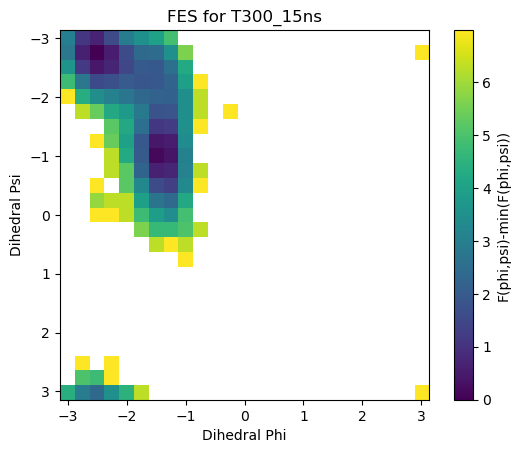

In [7]:
data = fes_gen(traj_15, "T300_15ns")

/state/partition1/job-52002269/ipykernel_568851/3553127455.py:9: RuntimeWarning: divide by zero encountered in log
  F = -np.log(hist)


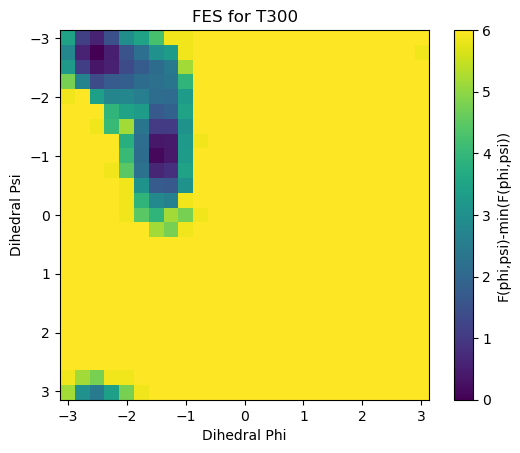

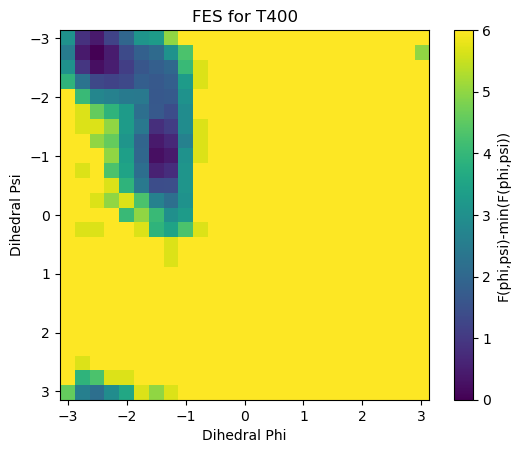

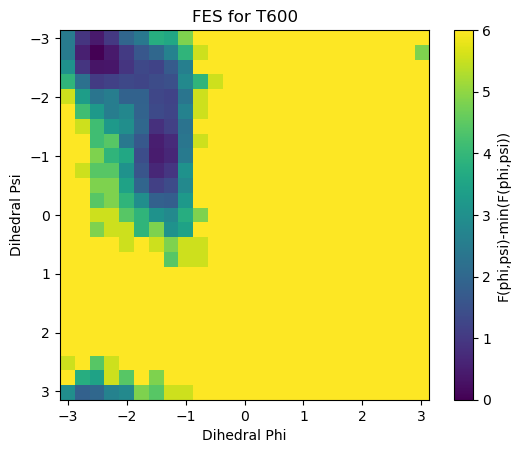

In [9]:
for temp in ['T300', 'T400', 'T600']:
    traj = mdtraj.load('./{}/adp_exchange3temps.trr'.format(temp), top='./{}/adp_exchange3temps.gro'.format(temp))
    data = fes_gen(traj, temp, True)

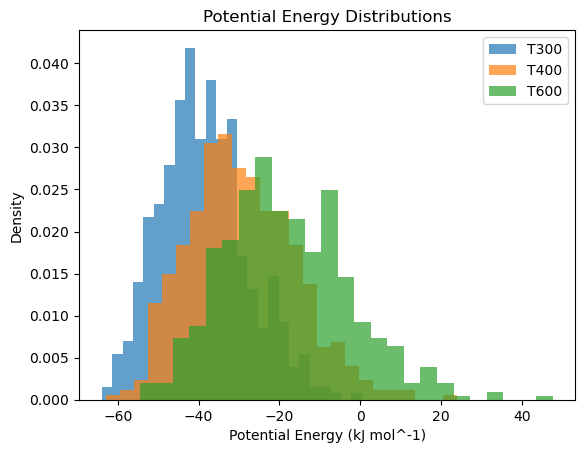

In [10]:
for temp in ['T300', 'T400', 'T600']:
    potential_e = np.loadtxt('./{}/adp_exchange_energy.xvg'.format(temp), comments=["@", "#"], unpack=True)
    plt.hist(potential_e[1], bins=25, label=temp, density=True, alpha=0.7)
plt.legend()
plt.xlabel('Potential Energy (kJ mol^-1)')
plt.ylabel('Density')
plt.title('Potential Energy Distributions')
plt.savefig("../Figures/PE_distr_replica.png")
plt.show()

In [11]:
def filter_frame(traj, n=100):
    return [traj[i] for i in range(len(traj)) if i%100 == 0]

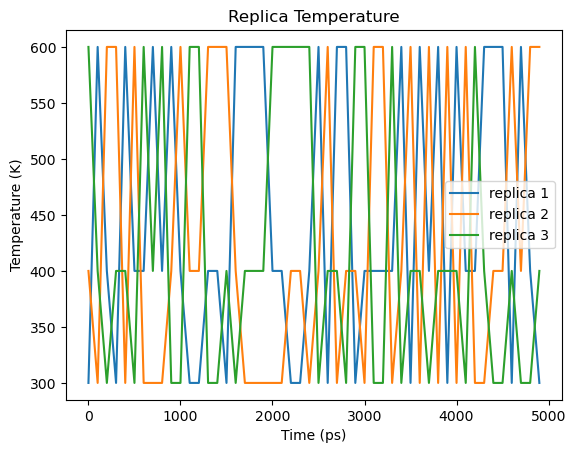

In [12]:
replica_temp = np.loadtxt('./T300/replica_temp.xvg', comments=["@", "#"], unpack=True)
replica_index = np.loadtxt('./T300/replica_index.xvg', comments=["@", "#"], unpack=True)
x = filter_frame(replica_temp[0,:])
for i in range(1, np.shape(replica_temp)[0]):
    y = filter_frame(replica_temp[i,:])
    y_mod = [300 if y[j] == 0 else 400 if y[j] == 1 else 600 for j in range(len(y))]
    plt.plot(x, y_mod, label="replica {}".format(i))
plt.xlabel("Time (ps)")
plt.ylabel("Temperature (K)")
plt.title("Replica Temperature")
plt.savefig("../Figures/replica_temp.png")
plt.legend()